## IF4091 Pembelajaran Mesin
## Tugas Kecil I: Eksplorasi scikit-learn untuk Clustering pada Jupyter Notebook

**Nama : Erick Wijaya**

**NIM: 13515057**
  
**Kelas: K01**


# Import Statements

In [37]:
from matplotlib.colors import LogNorm
from mst_clustering import MSTClustering
from pyclustering.cluster.bang import bang, bang_visualizer
from pyclustering.cluster.kmedoids import kmedoids
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

# Load Datasets

**Pada tahap load, datasets diload kemudian labelnya dihapus karena ingin melakukan clustering (unsupervised learning)**

In [38]:
# Load iris
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']], 
                    columns= iris_data['feature_names'] + ['target'])
del iris_df["target"]

# Load tennis
tennis_df_raw = pd.read_csv("datasets/tennis.csv")
del tennis_df_raw["play"]

# Preprocessing

**Pada tahap preprocessing, data tennis akan diproses sehingga nilai setiap atribut diubah menjadi atribut integer dengan menggunakan LabelEncoder.**

**Setelah itu, data iris dan tennis akan ditampilkan dengan menggunakan PCA sehingga data yang memiliki dimensi lebih dari 2 dapat direpresentasikan dengan plot 2 dimensi.**

In [39]:
# change string/object values to integer
le = LabelEncoder()
tennis_df = pd.DataFrame()
for column in tennis_df_raw:
    tennis_df[column] = le.fit_transform(tennis_df_raw[column])

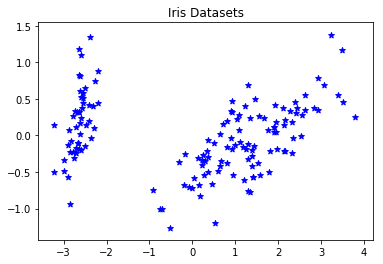

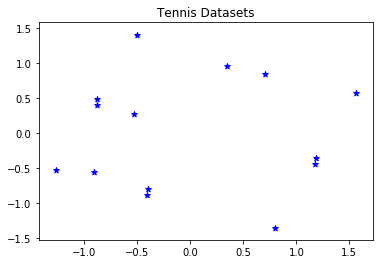

In [40]:
def plot_initial(df, title):
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    for i in range(0, pca_2d.shape[0]):
        c = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
    pl.title(title)
    pl.show()

plot_initial(iris_df, "Iris Datasets")
plot_initial(tennis_df, "Tennis Datasets")

# Model Training

In [41]:
k_iris = 3
k_tennis = 2

In [42]:
def plot_cluster(df, model_labels, title):
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    unique_labels = list(set(model_labels))
    colors = ['r', 'g', 'b']
    markers = ['+', 'o', '*']
    clusters = [None] * len(unique_labels)
    for i in range(0, pca_2d.shape[0]):
        idx = unique_labels.index(model_labels[i])
        clusters[idx] = pl.scatter(pca_2d[i,0], pca_2d[i,1], c=colors[idx], marker=markers[idx])
    legends = []
    for i, cluster in enumerate(clusters):
        if cluster != None:
            legends.append('Cluster ' + str(i))
    pl.legend(clusters, legends)
    pl.title(title)
    pl.show()
    
def plot_cluster_DBSCAN(df, model_labels, title):
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    unique_labels = list(set(model_labels))
    colors = ['r', 'g', 'b', 'k']
    markers = ['+', 'o', '*', 'v']
    clusters = [None] * len(unique_labels)
    is_core = [True] * len(unique_labels)
    for i in range(0, pca_2d.shape[0]):
        idx = unique_labels.index(model_labels[i])
        is_core[idx] = model_labels[i] != -1
        clusters[idx] = pl.scatter(pca_2d[i,0], pca_2d[i,1], c=colors[idx], marker=markers[idx])
    legends = []
    for i, cluster in enumerate(clusters):
        if cluster != None:
            if is_core[i]:
                legends.append('Cluster ' + str(i))
            else:
                legends.append('Outlier')
    pl.legend(clusters, legends)
    pl.title(title)
    pl.show()

def plot_cluster_GMM(df, k, title, cov='full', threshold=0.001):
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    model = GaussianMixture(n_components=k, covariance_type=cov, tol=threshold).fit(pca_2d)
    x = np.linspace(-20., 30.)
    y = np.linspace(-20., 40.)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -model.score_samples(XX)
    Z = Z.reshape(X.shape)

    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                     levels=np.logspace(0, 3, 10))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    plt.scatter(pca_2d[:, 0], pca_2d[:, 1], .8)

    plt.title(title)
    plt.axis('tight')
    plt.show()

## 1. Agglomerative Clustering

Parameter Agglomerative Clustering:
1. n_clusters: jumlah cluster (default=2)
2. affinity: metrik yang digunakan untuk menghitung jarak linkage (default=euclidean)
3. connectivity: matriks ketetanggan node, untuk structured hierarchical algorithm (default=None)
4. compute_full_tree: apakah proses clustering dihentikan setelah n_cluster iterasi atau tidak (default=auto)
5. linkage: kriteria linkage yang digunakan, misalnya 'ward', 'complete', 'average' (default=ward)

**a. Eksperimen Agglomerative Clustering dengan parameter linkage complete**

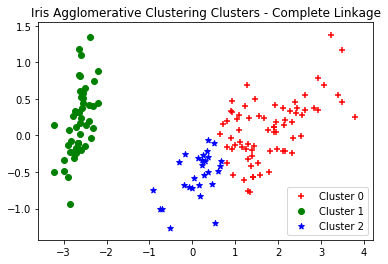

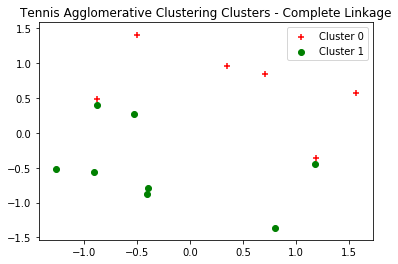

In [43]:
iris_agglo1 = AgglomerativeClustering(n_clusters=k_iris, linkage='complete').fit(iris_df)
tennis_agglo1 = AgglomerativeClustering(n_clusters=k_tennis, linkage='complete').fit(tennis_df)

plot_cluster(iris_df, iris_agglo1.labels_, "Iris Agglomerative Clustering Clusters - Complete Linkage")
plot_cluster(tennis_df, tennis_agglo1.labels_, "Tennis Agglomerative Clustering Clusters - Complete Linkage")

**b. Eksperimen Agglomerative Clustering dengan parameter linkage ward**

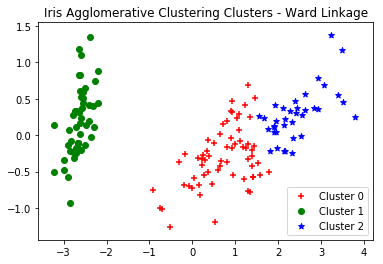

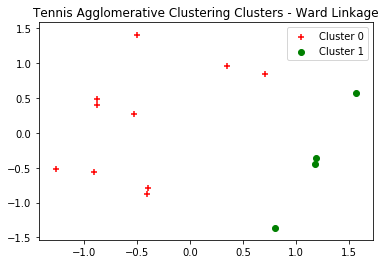

In [44]:
iris_agglo = AgglomerativeClustering(n_clusters=k_iris, affinity='euclidean', linkage='ward').fit(iris_df)
tennis_agglo = AgglomerativeClustering(n_clusters=k_tennis, affinity='euclidean', linkage='ward').fit(tennis_df)

plot_cluster(iris_df, iris_agglo.labels_, "Iris Agglomerative Clustering Clusters - Ward Linkage")
plot_cluster(tennis_df, tennis_agglo.labels_, "Tennis Agglomerative Clustering Clusters - Ward Linkage")

**c. Simpan model**

In [45]:
joblib.dump(iris_agglo, 'iris_agglo.pkl')
joblib.dump(tennis_agglo, 'tennis_agglo.pkl')
print("Agglomerative Clustering models saved")

Agglomerative Clustering models saved


## 2. DBSCAN

Beberapa parameter DBSCAN:
1. eps: jarak maksimum diantara 2 data yang dianggap saling bertetangga (default=0.5)
2. min_samples: jumlah tetangga data minimal untuk dianggap sebagai core point (default=5)
3. metric: metrik yang digunakan untuk menghitung jarak antar data (default=euclidean
4. algorithm: algoritma NN, misalnya 'auto', 'ball_tree', 'kd_tree', 'brute' (default=auto)

**a. Eksperimen DBSCAN dengan parameter default**

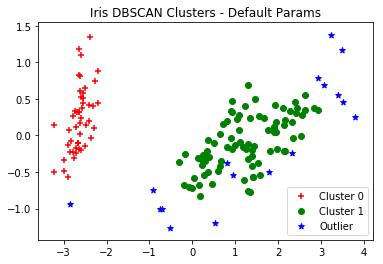

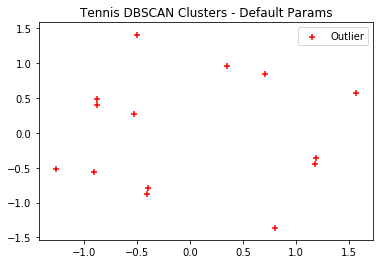

In [46]:
iris_dbscan1 = DBSCAN().fit(iris_df)
tennis_dbscan1 = DBSCAN().fit(tennis_df)

plot_cluster_DBSCAN(iris_df, iris_dbscan1.labels_, "Iris DBSCAN Clusters - Default Params")
plot_cluster_DBSCAN(tennis_df, tennis_dbscan1.labels_, "Tennis DBSCAN Clusters - Default Params")

**b. Eksperimen DBSCAN dengan parameter epsilon, min samples, dan algoritma DBSCAN**

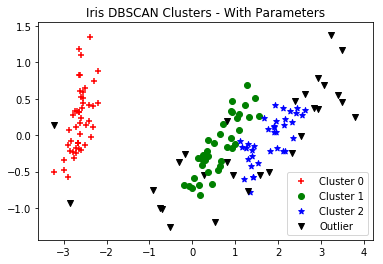

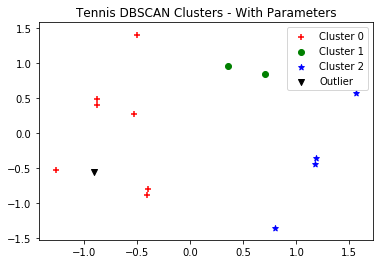

In [47]:
iris_dbscan = DBSCAN(eps=0.42, min_samples=5, algorithm='kd_tree').fit(iris_df)
tennis_dbscan = DBSCAN(eps=1, min_samples=2, algorithm='kd_tree').fit(tennis_df)

plot_cluster_DBSCAN(iris_df, iris_dbscan.labels_, "Iris DBSCAN Clusters - With Parameters")
plot_cluster_DBSCAN(tennis_df, tennis_dbscan.labels_, "Tennis DBSCAN Clusters - With Parameters")

**c. Simpan model**

In [48]:
joblib.dump(iris_dbscan, 'iris_dbscan.pkl')
joblib.dump(tennis_dbscan, 'tennis_dbscan.pkl')
print("DBSCAN models saved")

DBSCAN models saved


## 3. K-Means

Beberapa parameter K-Means:
1. n_clusters: jumlah cluster yang dihasilkan (default=8)
2. init: metode inisialisasi, misalnya 'k-means++', 'random', atau ndarray (default=k-means++)
3. n_init: jumlah algoritma k-means akan dijalankan pada seed/centroid yang berbeda untuk menemukan seed terbaik
4. max_iter: jumlah iterasi maksimum (default=300)

**a. Eksperimen K-Means dengan parameter n_init dan jumlah maksimum iterasi yang kecil**

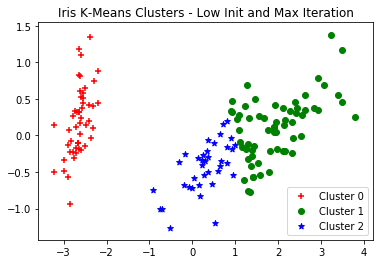

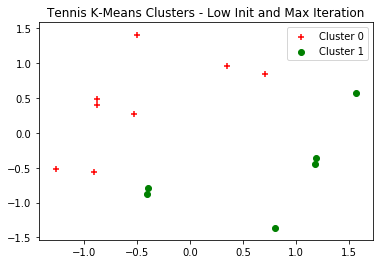

In [75]:
iris_kmeans1 = KMeans(n_clusters=k_iris, n_init=1, max_iter=2).fit(iris_df)
tennis_kmeans1 = KMeans(n_clusters=k_tennis, n_init=1, max_iter=2).fit(tennis_df)

plot_cluster(iris_df, iris_kmeans1.labels_, "Iris K-Means Clusters - Low Init and Max Iteration")
plot_cluster(tennis_df, tennis_kmeans1.labels_, "Tennis K-Means Clusters - Low Init and Max Iteration")

**b. Eksperimen K-Means dengan parameter n_init dan jumlah maksimum iterasi besar**

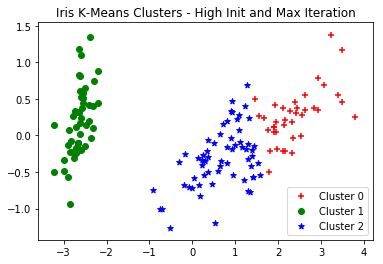

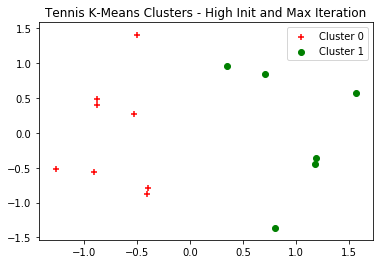

In [50]:
iris_kmeans = KMeans(n_clusters=k_iris, n_init=20, max_iter=100).fit(iris_df)
tennis_kmeans = KMeans(n_clusters=k_tennis, n_init=20, max_iter=100).fit(tennis_df)

plot_cluster(iris_df, iris_kmeans.labels_, "Iris K-Means Clusters - High Init and Max Iteration")
plot_cluster(tennis_df, tennis_kmeans.labels_, "Tennis K-Means Clusters - High Init and Max Iteration")

**c. Simpan Model**

In [51]:
joblib.dump(iris_kmeans, 'iris_kmeans.pkl')
joblib.dump(tennis_kmeans, 'tennis_kmeans.pkl')
print("K-Means models saved")

K-Means models saved


## 4. Gaussian Mixture

Beberapa parameter GMM:
1. n_components: jumlah komponen mixture (default=1)
2. covariance_type: tipe kovariansi, misalnya 'full', 'tied', 'diag', 'spherical' (default=full)
3. tol: threshold konvergensi (default=1e-3)

**a. Eksperimen GMM dengan parameter default**

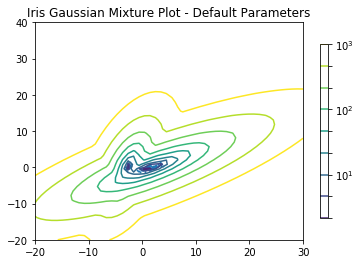

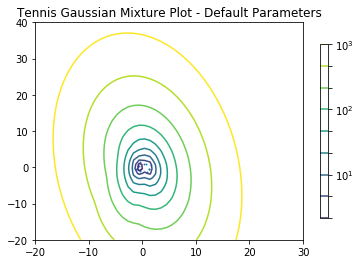

In [52]:
iris_gauss1 = GaussianMixture(n_components=k_iris).fit(iris_df)
tennis_gauss1 = GaussianMixture(n_components=k_tennis).fit(tennis_df)

plot_cluster_GMM(iris_df, k_iris, "Iris Gaussian Mixture Plot - Default Parameters")
plot_cluster_GMM(tennis_df, k_tennis, "Tennis Gaussian Mixture Plot - Default Parameters")

**b. Eksperimen GMM dengan parameter komponen, tipe kovarian, dan threshold**

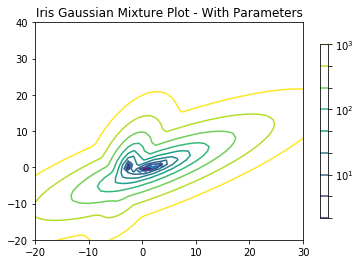

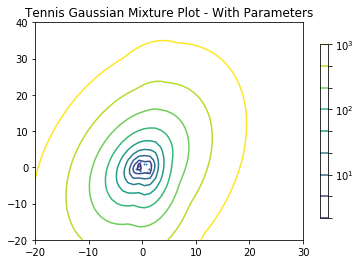

In [78]:
iris_gauss = GaussianMixture(n_components=k_iris, covariance_type='spherical', tol=0.0001).fit(iris_df)
tennis_gauss = GaussianMixture(n_components=k_tennis, covariance_type='spherical', tol=0.0001).fit(tennis_df)

plot_cluster_GMM(iris_df, k_iris, "Iris Gaussian Mixture Plot - With Parameters")
plot_cluster_GMM(tennis_df, k_tennis, "Tennis Gaussian Mixture Plot - With Parameters")

**c. Simpan model**

In [54]:
joblib.dump(iris_gauss, 'iris_gauss.pkl')
joblib.dump(tennis_gauss, 'tennis_gauss.pkl')
print("Gaussian Mixture models saved")

Gaussian Mixture models saved


## 5. K-Medoids

Beberapa parameter K-Medoids:
1. data: data yang ingin diproses
2. initial_index_medoids: titik-titik centroid awal
3. tolerance: threshold untuk konvergensi (default=0.001)
4. ccore: true apabila ingin menggunakan library C dalam proses K-Medoids (default=True)

In [55]:
def data_clusters_to_cluster(cluster_idxs):
    size = 0
    for i in range(0, len(cluster_idxs)):
        size += len(cluster_idxs[i])
    labels = [0] * size
    for i in range(0, len(cluster_idxs)):
        for j in range(0, len(cluster_idxs[i])):
            labels[cluster_idxs[i][j]] = i
    return labels

**a. Eksperimen K-Medoids dengan parameter initial medoid random dan toleransi tinggi**

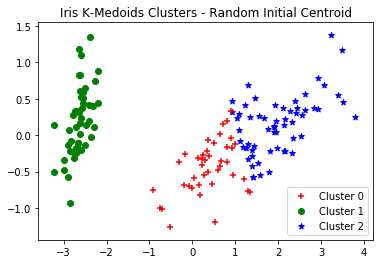

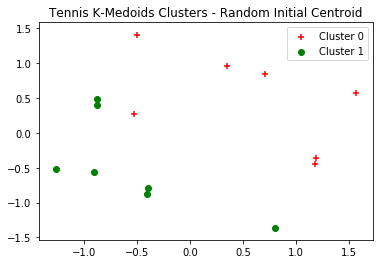

In [91]:
iris_init_medoids1 = np.random.randint(low=0, high=iris_df.shape[0], size=k_iris)
iris_kmedoids1 = kmedoids(data=iris_df.get_values(), initial_index_medoids=iris_init_medoids1, tolerance=0.5)
iris_kmedoids1.process()

tennis_init_medoids1 = np.random.randint(low=0, high=tennis_df.shape[0], size=k_tennis)
tennis_kmedoids1 = kmedoids(data=tennis_df.get_values(), initial_index_medoids=tennis_init_medoids1, tolerance=0.5)
tennis_kmedoids1.process()

plot_cluster(iris_df, data_clusters_to_cluster(
    iris_kmedoids1.get_clusters()), "Iris K-Medoids Clusters - Random Initial Centroid")
plot_cluster(tennis_df, data_clusters_to_cluster(
    tennis_kmedoids1.get_clusters()), "Tennis K-Medoids Clusters - Random Initial Centroid")

**b. Eksperimen K-Medoids dengan initial centroid tetap dan toleransi rendah**

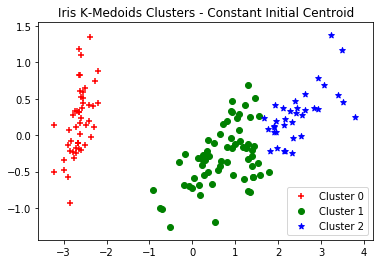

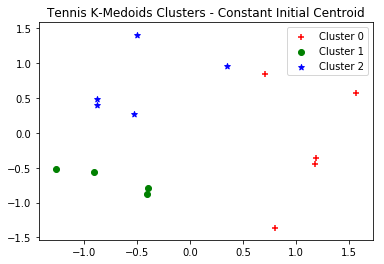

In [57]:
iris_init_medoids = [25, 75, 125]
iris_kmedoids = kmedoids(data=iris_df.get_values(), initial_index_medoids=iris_init_medoids)
iris_kmedoids.process()

tennis_init_medoids = [4, 8, 12]
tennis_kmedoids = kmedoids(data=tennis_df.get_values(), initial_index_medoids=tennis_init_medoids)
tennis_kmedoids.process()

plot_cluster(iris_df, data_clusters_to_cluster(
    iris_kmedoids.get_clusters()), "Iris K-Medoids Clusters - Constant Initial Centroid")
plot_cluster(tennis_df, data_clusters_to_cluster(
    tennis_kmedoids.get_clusters()), "Tennis K-Medoids Clusters - Constant Initial Centroid")

**c. Simpan model**

In [58]:
joblib.dump(iris_kmedoids.get_cluster_encoding(), 'iris_kmedoids.pkl')
joblib.dump(tennis_kmedoids.get_cluster_encoding(), 'tennis_kmedoids.pkl')
print("K-Medoids models saved")

K-Medoids models saved


## 6. MST Clustering

Beberapa parameter MST:
1. cutoff: jumlah edge yang dihapus
2. cutoff_scale: hapus edge dengan jarak melebihi skala
3. min_cluster_size: jumlah minimum data per cluster, bila lebih kecil maka data akan diassign pada background (default=1)
4. metric: metrik untuk menghitung jarak antar data (default=euclidean)

**a. Eksperimen MST dengan parameter default**

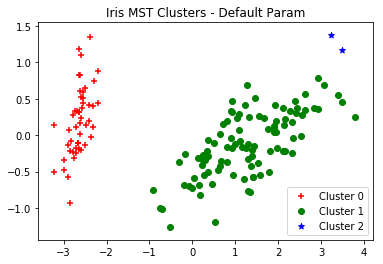

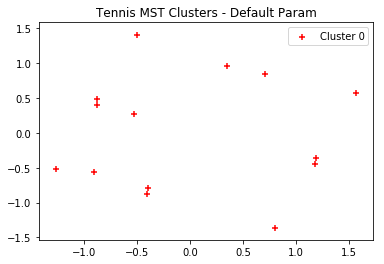

In [59]:
iris_mst1 = MSTClustering(cutoff=k_iris-1).fit(iris_df)
tennis_mst1 = MSTClustering(cutoff=k_tennis-1).fit(tennis_df)

plot_cluster(iris_df, iris_mst1.fit_predict(iris_df).tolist(), "Iris MST Clusters - Default Param")
plot_cluster(tennis_df, tennis_mst1.fit_predict(iris_df).tolist(), "Tennis MST Clusters - Default Param")

**b. Eksperimen MST dengan parameter jumlah cluster dan metrik**

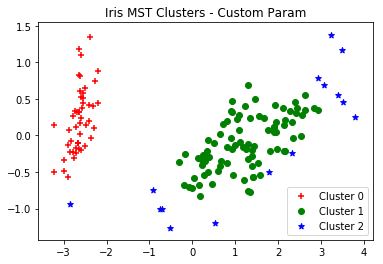

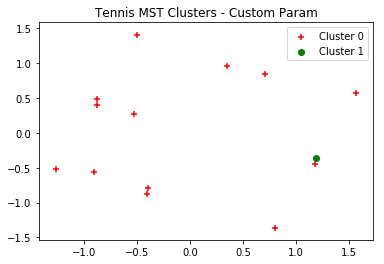

In [60]:
iris_mst = MSTClustering(cutoff=k_iris-1, cutoff_scale=0.8, min_cluster_size=10, metric='manhattan').fit(iris_df)
tennis_mst = MSTClustering(cutoff=k_tennis-1, cutoff_scale=0.5, min_cluster_size=1, metric='manhattan').fit(tennis_df)

plot_cluster(iris_df, iris_mst.fit_predict(iris_df).tolist(), "Iris MST Clusters - Custom Param")
plot_cluster(tennis_df, tennis_mst.fit_predict(iris_df).tolist(), "Tennis MST Clusters - Custom Param")"iris: Cluster"

**c. Simpan model**

In [99]:
joblib.dump(iris_mst, 'iris_mst.pkl')
joblib.dump(tennis_mst1, 'tennis_mst.pkl')
print("MST models saved")

MST models saved


## 7. Grid Clustering

Beberapa parameter Grid:
1. data: data yang ingin dicluster
2. levels: jumlah pemisahan 1 blok pada grid

**a. Eksperimen Grid Clustering**

Iris Grid Clustering Blocks and Dendogram


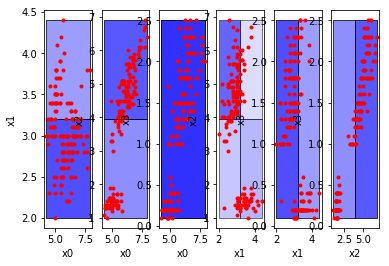

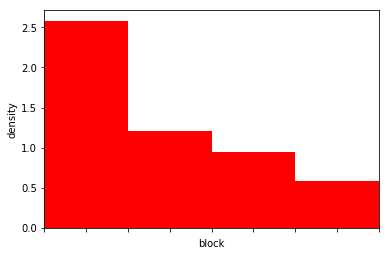


Tennis Grid Clustering Blocks and Dendogram


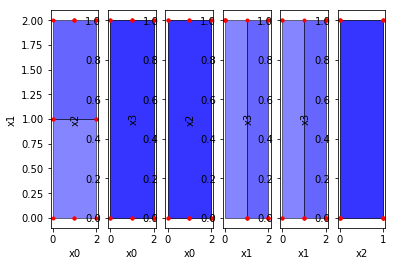

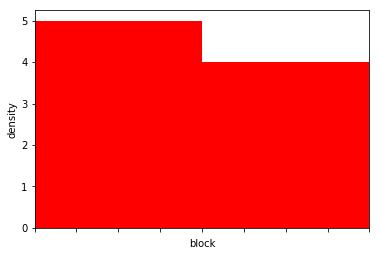

In [62]:
iris_grid = bang(data=iris_df.values.tolist(), levels=k_iris)
iris_grid.process()

tennis_grid = bang(data=tennis_df.values.tolist(), levels=k_tennis)
tennis_grid.process()

print("Iris Grid Clustering Blocks and Dendogram")
bang_visualizer.show_blocks(iris_grid.get_directory())
bang_visualizer.show_dendrogram(iris_grid.get_dendrogram())
print()
print("Tennis Grid Clustering Blocks and Dendogram")
bang_visualizer.show_blocks(tennis_grid.get_directory())
bang_visualizer.show_dendrogram(tennis_grid.get_dendrogram())

**b. Simpan model**

In [63]:
joblib.dump(iris_grid, 'iris_grid.pkl')
joblib.dump(tennis_grid, 'tennis_grid.pkl')
print("Grid Clustering models saved")

Grid Clustering models saved


# Load Models

In [102]:
iris_agglo_loaded = joblib.load('iris_agglo.pkl')
tennis_agglo_loaded = joblib.load('tennis_agglo.pkl')
iris_dbscan_loaded = joblib.load('iris_dbscan.pkl')
tennis_dbscan_loaded = joblib.load('tennis_dbscan.pkl')
iris_kmeans_loaded = joblib.load('iris_kmeans.pkl')
tennis_kmeans_loaded = joblib.load('tennis_kmeans.pkl')
iris_gauss_loaded = joblib.load('iris_gauss.pkl')
tennis_gauss_loaded = joblib.load('tennis_gauss.pkl')
iris_kmedoids_loaded = joblib.load('iris_kmedoids.pkl')
tennis_kmedoids_loaded = joblib.load('tennis_kmedoids.pkl')
iris_mst_loaded = joblib.load('iris_mst.pkl')
tennis_mst_loaded = joblib.load('tennis_mst.pkl')
iris_grid_loaded = joblib.load('iris_grid.pkl')
tennis_grid_loaded = joblib.load('tennis_grid.pkl')

# New Instances

**Didefinisikan sebuah instans baru untuk iris dan tennis**

In [65]:
iris_new = {
    'sepal length (cm)': [5.4], 
    'sepal width (cm)' : [3.7], 
    'petal length (cm)': [1.5], 
    'petal width (cm)' : [0.2] 
}
tennis_new = {'outlook': [0], 'temp': [1], 'humidity': [1], 'windy': [0]}

iris_new_df = pd.DataFrame(data=iris_new)
tennis_new_df = pd.DataFrame(data=tennis_new)

iris_new_df_c = pd.concat([iris_df, iris_new_df])
tennis_new_df_c = pd.concat([tennis_df, tennis_new_df])

# Assigment Cluster

## 1. Agglomerative Clustering

In [66]:
iris_predict_agglo = iris_agglo_loaded.fit_predict(iris_new_df_c)[len(iris_df)]
print("iris: Cluster", iris_predict_agglo)
tennis_predict_agglo = tennis_agglo_loaded.fit_predict(tennis_new_df_c)[len(tennis_df)]
print("tennis: Cluster", tennis_predict_agglo)

iris: Cluster 1
tennis: Cluster 0


## 2. DBSCAN

In [67]:
iris_predict_dbscan = iris_dbscan_loaded.fit_predict(iris_new_df_c)[len(iris_df)]
print("iris: Cluster", iris_predict_dbscan)
tennis_predict_dbscan = tennis_dbscan_loaded.fit_predict(tennis_new_df_c)[len(tennis_df)]
print("tennis: Cluster", tennis_predict_dbscan)

iris: Cluster 0
tennis: Cluster 1


## 3. K-Means

In [68]:
iris_predict_kmeans = iris_kmeans_loaded.predict(iris_new_df)[0]
print("iris: Cluster", iris_predict_kmeans)
tennis_predict_kmeans = tennis_kmeans_loaded.predict(tennis_new_df)[0]
print("tennis: Cluster", tennis_predict_kmeans)

iris: Cluster 1
tennis: Cluster 1


## 4. Gaussian Mixture

In [69]:
iris_predict_gauss = iris_gauss_loaded.predict(iris_new_df)[0]
print("iris: Cluster", iris_predict_gauss)
tennis_predict_gauss = tennis_gauss_loaded.predict(tennis_new_df)[0]
print("tennis: Cluster", tennis_predict_gauss)

iris: Cluster 1
tennis: Cluster 1


## 5. K-Medoids

In [70]:
iris_predict_kmedoids = kmedoids(data=iris_new_df_c.get_values(), initial_index_medoids=iris_init_medoids)
iris_predict_kmedoids.process()
print("iris: Cluster", data_clusters_to_cluster(iris_predict_kmedoids.get_clusters())[len(iris_df)])
tennis_predict_kmedoids = kmedoids(data=tennis_new_df_c.get_values(), initial_index_medoids=tennis_init_medoids)
tennis_predict_kmedoids.process()
print("tennis: Cluster", data_clusters_to_cluster(tennis_predict_kmedoids.get_clusters())[len(tennis_df)])

iris: Cluster 0
tennis: Cluster 2


## 6. MST Clustering

In [104]:
iris_predict_mst = iris_mst_loaded.fit_predict(iris_new_df_c)[len(iris_df)]
print("iris: Cluster", iris_predict_mst)
tennis_predict_mst = tennis_mst_loaded.fit_predict(tennis_new_df_c)[len(tennis_df)]
print("tennis: Cluster", tennis_predict_mst)

iris: Cluster 0
tennis: Cluster 1


## 7. Grid Clustering

In [72]:
iris_predict_grid = bang(data=iris_new_df_c.values.tolist(), levels=k_iris)
iris_predict_grid.process()
print("iris: Cluster", data_clusters_to_cluster(iris_predict_grid.get_clusters())[len(iris_df)])
tennis_predict_grid = bang(data=tennis_new_df_c.values.tolist(), levels=k_tennis)
tennis_predict_grid.process()
print("tennis: Cluster", data_clusters_to_cluster(tennis_predict_grid.get_clusters())[len(tennis_df)])

iris: Cluster 0
tennis: Cluster 0
